# Portfolio Part 4

Student Name: Umut Demirhan

Student ID: 46739106

Forest fires play an essential role in the natural cycle of wood growth and replenishment. They clear the forest floor of dead trees, leaves, and competing vegetation so that new plants can develop. Remove weak or diseased trees to make room and nutrients for stronger ones. However, when fires become too hot and uncontrollable or burn at the "wildland-urban interface" (the area where woodlands, residences, or other developed areas meet), they can be dangerous and deadly. [The Good and Bad of Forest Fires](https://mylandplan.org/content/good-and-bad-forest-fires#:~:text=Forest%20fires%20help%20in%20the,so%20new%20plants%20can%20grow)

This Portfolio task aims to predict whether there is any fire risk instead of determining the severity of the fires in the northeast region of Portugal by using the data cited below.The source of the dataset is [Forest Fires Data Set(UCI)](http://archive.ics.uci.edu/ml/datasets/Forest+Fires).
Alternatively, the direct link to download the dataset is [here](http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv).
The actual location of the park on google maps is [Here](https://www.google.com/maps/place/Montesinho+Natural+Park/@41.6297393,-7.047171,8.92z/data=!4m5!3m4!1s0xd3a4f6625fa02dd:0x72771d4ab83da54d!8m2!3d41.9061617!4d-6.8599935)
    
    
   
#### Description of Fields
For more information about the dataset and its attributes below cited from  [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf) 

*The Fire Weather Index (FWI)* is a meteorologically based index used worldwide to estimate fire danger. It consists of different components that account for the effects of fuel moisture and wind on fire behaviour and spread.\
**Attribute Information**:

1. __X__ - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. __Y__ - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. __month__ - month of the year: 'jan' to 'dec'
4. __day__ - day of the week: 'mon' to 'sun'
5. __FFMC__ - FFMC index from the FWI system: 18.7 to 96.20
6. __DMC__ - DMC index from the FWI system: 1.1 to 291.3
7. __DC__ - DC index from the FWI system: 7.9 to 860.6
8. __ISI__ - ISI index from the FWI system: 0.0 to 56.10
9. __temp__ - temperature in Celsius degrees: 2.2 to 33.30
10. __RH__ - relative humidity in %: 15.0 to 100
11. __wind__ - wind speed in km/h: 0.40 to 9.40
12. __rain__ - outside rain in mm/m2 : 0.0 to 6.4
13. __area__ - the burned area of the forest (in ha): 0.00 to 1090.84


In [1]:
# Importing necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 25,9
%matplotlib inline

### The Dataset Import and Cleanup
Unfortunaly, the dataset was already clean, and I could not find the raw data in any other sources; Therefore, I added some rows with null values to the original dataset to clean. 

In [2]:
# Importing the dataset
df_raw = pd.read_csv('files/forestfires.csv')
df_raw.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [3]:
# exploring the shape of the data
df_raw.shape

(523, 13)

In [4]:
# Some information about the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       523 non-null    int64  
 1   Y       523 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 53.2+ KB


In [5]:
# dropping the rows that have null values
df_unprepared = df_raw.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
print('Number of rows dropped:' , len(df_raw) - len(df_unprepared))

Number of rows dropped: 6


In [6]:
#missing value treatment
df_unprepared.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

###### Remark
The dataset has been cleaned; However, for the aim of this portfolio, The dataset is needed to prepare for analysis and predictive modelling

### Exploring and Preparing the dataset for predictive modelling

The target variable(area) provides a piece of metric information about how severe the fire is; However, this portfolio aims to predict if any fires occur so that authorities can take necessary measures in advance.\
To do that, the target will be change as if it differs from 0, then it will be changed to 1.

Before that, let's explore the target without changing, so that we may acquire some meaningful information.|

In [7]:
df_unprepared.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
518,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
519,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
520,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
521,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00
522,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31.0,4.5,0.0,0.00


###### Univariate Analysis (The target)

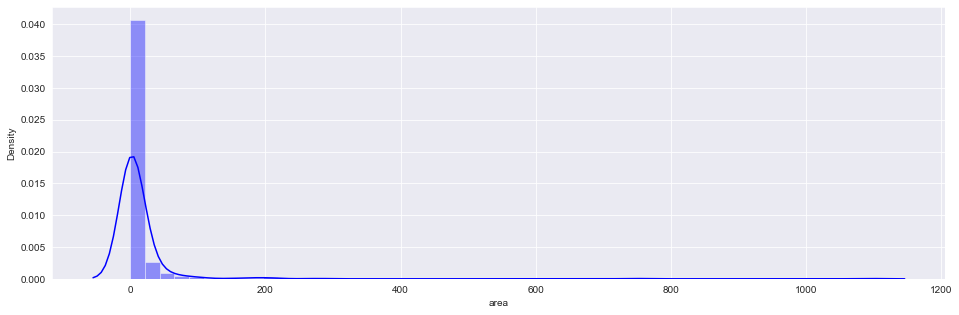

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


In [8]:
target = df_unprepared['area']
# Plotting a histogram to observe the density and the distribution of the targetdf_unprepared['area'].values[df_unprepared['area'].values > 0] = 1
sns.set_style('darkgrid')
df_unprepared
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
sns.set_style('darkgrid')
sns.distplot(target, color= 'b')
plt.show()
print("Skew: {}".format(target.skew()))
print("Kurtosis: {}".format(target.kurtosis()))


In [9]:
target = df_unprepared['area']
print('Descriptive statistics regarding target variable:')
print(target.describe())

Descriptive statistics regarding target variable:
count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


<AxesSubplot:xlabel='area'>

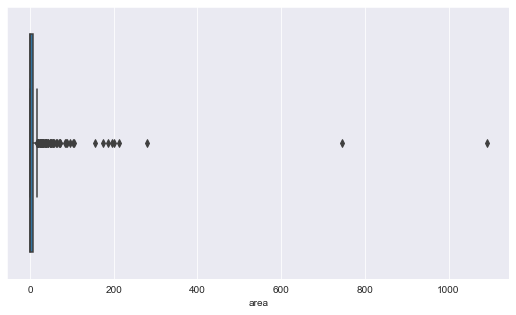

In [10]:
# Quick look the boxplot of the target to see the outliers
sns.boxplot(target)

##### Observation;
The majority of the samples in the data fall between 0 and 200 of the 'Area' output class, with the majority being less than 100 and most of them being zero. 4 outlier has been observed.

In [11]:
# Outlier points
from scipy.stats import zscore
y_outliers = df_unprepared[abs(zscore(target)) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
243,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40.0,2.2,0.0,212.88
244,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27.0,4.0,0.0,1090.84
421,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27.0,4.9,0.0,746.28
485,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57.0,4.9,0.0,278.53


###### Remark
Having looked the severity of the fires and its distribution, Now, it is time to convert the target variable into Boolean expressions.

In [12]:
# Here is the code for that, also the name is to change to 'fire'
df_unprepared['area'].values[df_unprepared['area'].values > 0] = 1
df_unprepared.rename(columns={'area': 'fire'}, inplace=True)
df_unprepared.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [13]:
target = df_unprepared['fire']
print('Descriptive statistics regarding target variable after the change:')
target.describe()

Descriptive statistics regarding target variable after the change:


count    517.000000
mean       0.522244
std        0.499989
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: fire, dtype: float64

###### Bivariate analysis
The target and the independent variables 

In [14]:
# Checking the locational codings
print('Number of unique X:', df_unprepared['X'].unique())
print('Number of unique Y:', df_unprepared['Y'].unique())

Number of unique X: [7 8 6 5 4 2 9 1 3]
Number of unique Y: [5 4 6 3 2 9 8]


In [15]:
# Checking the areas in the dataset with X,Y coordinates
# Creating another logical coding for areas as merging the two, so that unique areas detected in the dataset.
df_unprepared["XY"] = df_unprepared["X"].astype(str) + df_unprepared["Y"].astype(str)
df_unprepared["XY"] = df_unprepared["XY"].astype(int)
print('Unique X dimension coordinates;', len(df_unprepared["X"].unique()))
print('Unique Y dimension coordinates;',len(df_unprepared["Y"].unique()))
print('There is', len(df_unprepared["XY"].unique()) , 'areas in the data')

Unique X dimension coordinates; 9
Unique Y dimension coordinates; 7
There is 36 areas in the data


In [16]:
# Checking the the unique months and days of week in the data
print('Number of unique months:', df_unprepared['month'].unique())
print('Number of unique days:', df_unprepared['day'].unique())

Number of unique months: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
Number of unique days: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [17]:
df_unprepared.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire,XY
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,75
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,74
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,74
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0,86
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0,86


In [18]:
df_unprepared.columns.tolist()

['X',
 'Y',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'fire',
 'XY']

In [19]:
df = df_unprepared[['fire','X','Y','XY', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]

In [20]:
#Replacing the objects(months and days) with numerical values in order(1 to 12 and 1 to 7 respectively) 
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [21]:
df.head()

,fire,X,Y,XY,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.0,7,5,75,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0
1,0.0,7,4,74,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0
2,0.0,7,4,74,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0
3,0.0,8,6,86,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2
4,0.0,8,6,86,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0


In [22]:
df.shape

(517, 14)

In [23]:
# The correlation matrix
df.corr()

,fire,X,Y,XY,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
fire,1.000000,0.062491,0.056892,0.063629,0.130329,-0.042970,0.073823,0.062672,0.096724,0.035663,0.076047,-0.035587,0.055702,0.025550
X,0.062491,1.000000,0.539548,0.999055,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387
Y,0.056892,0.539548,1.000000,0.575634,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234
XY,0.063629,0.999055,0.575634,1.000000,-0.066553,-0.024486,-0.022824,-0.046589,-0.088665,0.004767,-0.051026,0.085981,0.017206,0.065220
month,0.130329,-0.065003,-0.066292,-0.066553,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438
day,-0.042970,-0.024922,-0.005453,-0.024486,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340
FFMC,0.073823,-0.021039,-0.046308,-0.022824,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702
DMC,0.062672,-0.048384,0.007782,-0.046589,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790
DC,0.096724,-0.085916,-0.101178,-0.088665,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861
ISI,0.035663,0.006210,-0.024488,0.004767,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668


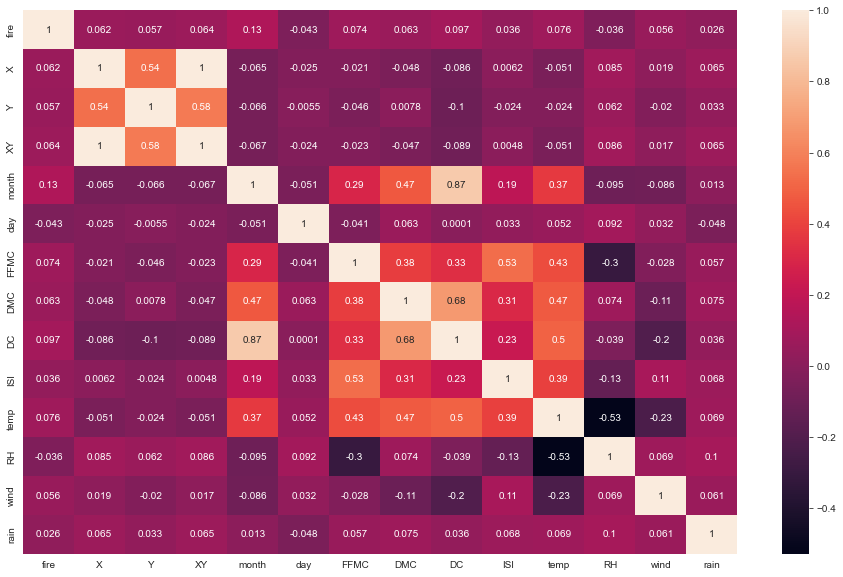

In [24]:
# Better way to examine correlation matrix is with a heatmap
plt.figure(figsize=(16, 10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Remark
The correlation matrix demonstrates that;
* The most correlated feature with the target variable is 'month' 
* The correlations beetween independent variables differ;
    * Most correlared one is between 'DC' and 'month' 
    * The feature 'temp' is mildy correlated with The Fire Weather Index (FWI) features which are 'FFMC', 'DMC', 'DC' and 'RH'

<AxesSubplot:xlabel='month', ylabel='fire'>

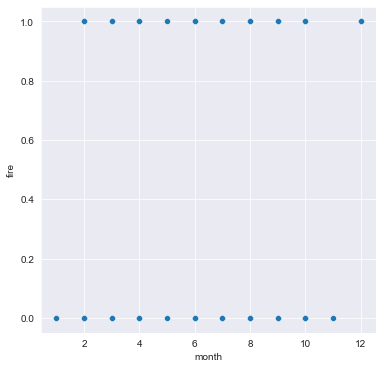

In [25]:
# Scatterpot with the most correlated feature('DMC')
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x = 'month',y='fire')

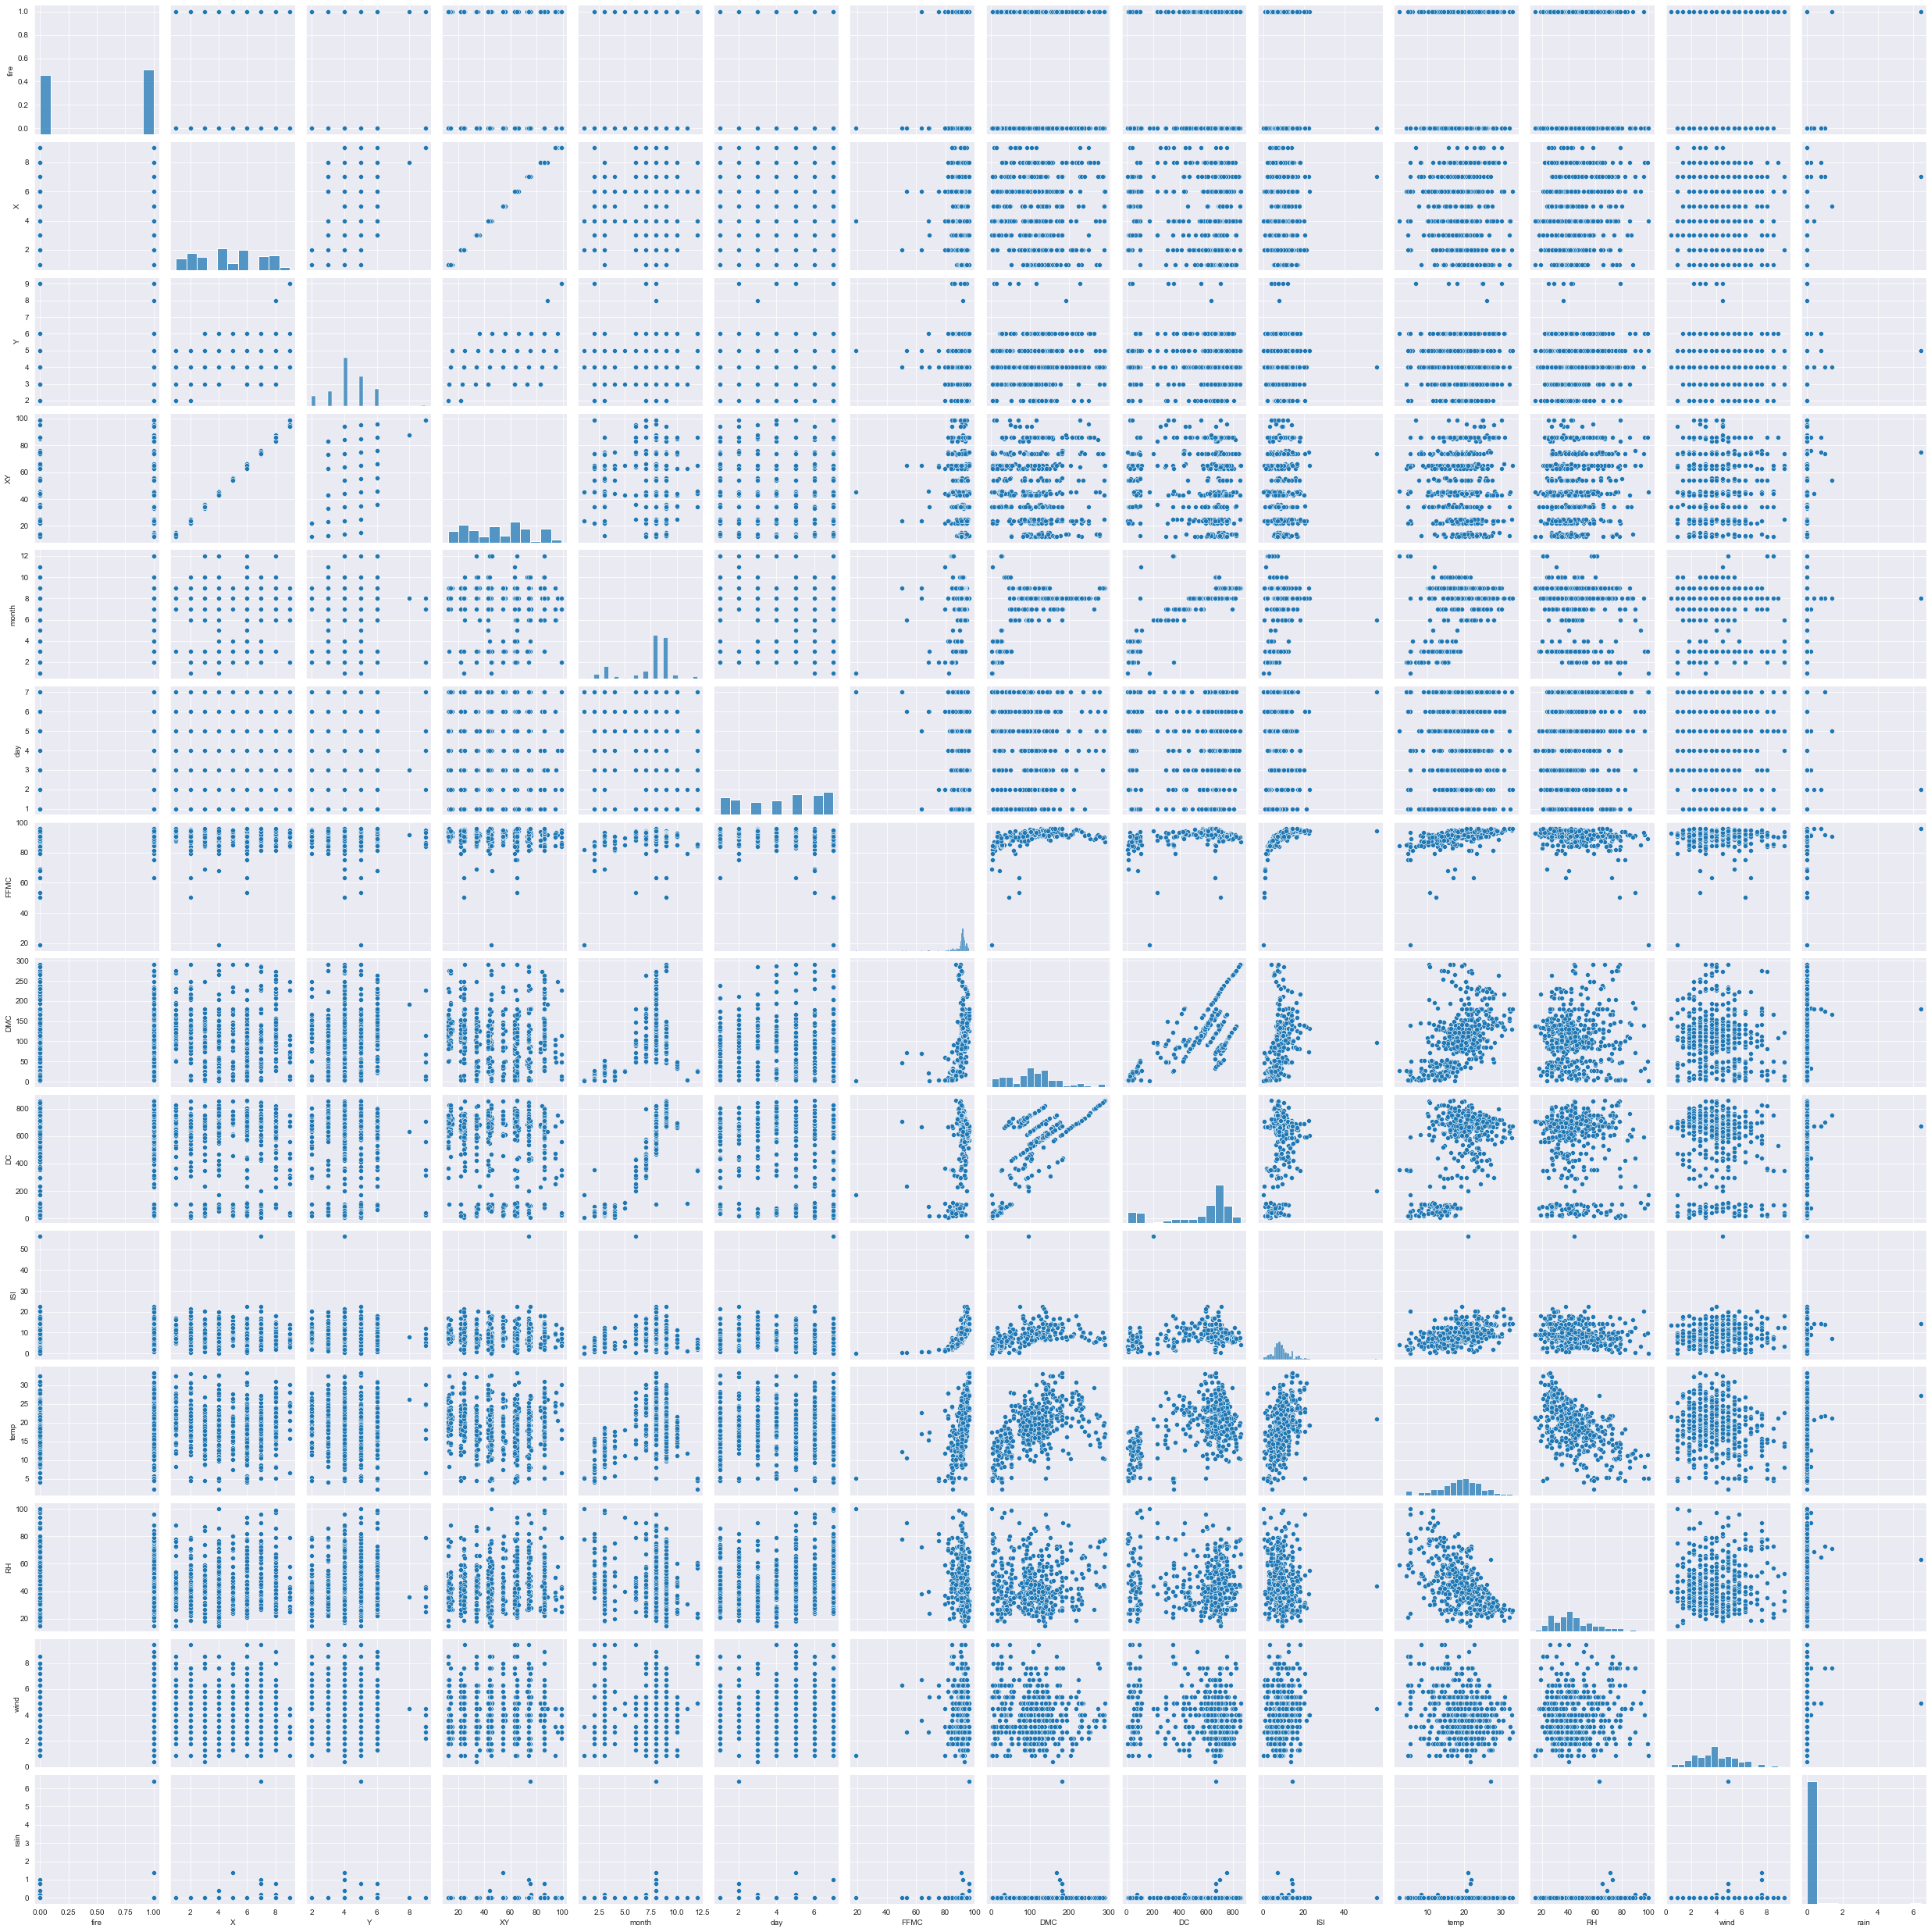

In [26]:
# Have a look at the distributions and scatterplots of the features
# for zooming in please double-click on the visuzaliasion or download it.
sns.set_style('darkgrid')
sns.pairplot(df)

###### Remark
The pair plot did not provide an important information about the data, but it can be seen that Logistic regression is more suitable for this task since the target is boolean.

<AxesSubplot:xlabel='XY', ylabel='fire'>

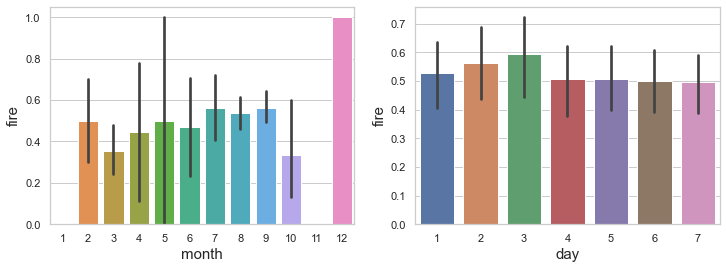

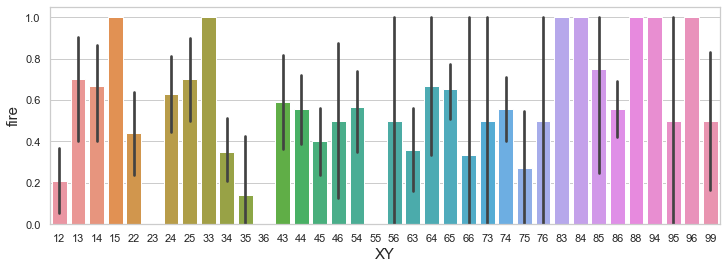

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.xlabel('month', size=15)
plt.ylabel('fire', size=15)
sns.barplot(x = 'month', y = 'fire', data = df)
plt.subplot(1, 2, 2)
plt.xlabel('day', size=15)
plt.ylabel('fire', size=15)
sns.barplot(x = 'day', y = 'fire', data = df)

plt.figure(figsize=(12,4))
plt.xlabel('XY', size=15)
plt.ylabel('fire', size=15)
sns.barplot(x = 'XY', y = 'fire', data = df)

###### Remark
Having looked at the barplots;
* There was no fire in January and November, but There was so many fires occured beetween them.
* As expected, the occurrence of a fire does not depend on the days of the week.
* The occurrences of fires vary in areas in the park;
    * The area (X:2, Y:3), (X:3, Y:6) and (X:5, Y:5) have never got on fire, they might be wetlands.
    * The area between (X:8 to 9 and Y:3 to 9) is an area where fires occurrence rates is high.


In [28]:
columns = df.columns.to_list()
columns

['fire',
 'X',
 'Y',
 'XY',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain']

# Logistic Regression

Now, it is time to do some prections despite the fact that correlations are weak. 

In [29]:
# Train and test all features together
train, test = train_test_split(df, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(413, 14)
(104, 14)


In [30]:
# Determining the feature columns; 
# The created 'XY' column cannot be using in the regression since it could ber misleading
feature_cols = [ 'X', 'Y', 'month','day','FFMC','DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X_train = train[feature_cols]
y_train = train['fire']
# for testing
X_test = test[feature_cols]
y_test = test['fire']

In [31]:
# Building our Logistic Regression model
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
predicted = logreg.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))
# Evaluating the accuracy of the trained model, accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test, predicted))

MSE: 0.5096153846153846
R^2: -1.0659670164917547
Accuracy score: 0.49038461538461536


In [32]:
# Classification report with confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[23 23]
 [30 28]]
              precision    recall  f1-score   support

         0.0       0.43      0.50      0.46        46
         1.0       0.55      0.48      0.51        58

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.50      0.49      0.49       104



In [33]:
# Making prediction using the model above
classes={0:'Safe',1:'Alert for fire'}
x_new=[[1,5, 1 ,7 ,50, 70.1, 800.1, 4.5, 31.3, 25, 5.8, 4]]
y_predict=logreg.predict(x_new)
print(classes[y_predict[0]])

Alert for fire


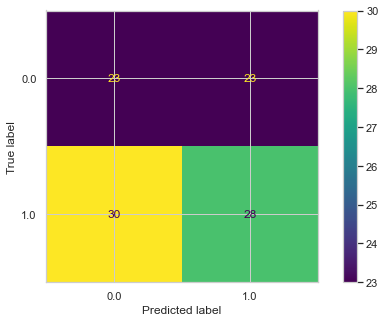

In [34]:
# Using the ConfusionMatrixDisplay feature to visualise the accuracy score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, predicted)
cm = ConfusionMatrixDisplay(y_test, predicted)
cm = confusion_matrix(y_test, predicted, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()
sns.set_style('dark')

In [35]:
# Applying RFE to use feature selection to improve the accuracy
from sklearn.feature_selection import RFE

estimator = LogisticRegression(C=1e9)
selector = RFE(estimator, 10) # selecting the best estimators
selector = selector.fit(X_test, y_test)
supp = selector.get_support()
feature_cols_array = np.array(feature_cols)
print("Selected features:", feature_cols_array[supp])
print("Coeffs:", selector.estimator_.coef_)
# testing the model
predicted = selector.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))
print("Accuracy score:", accuracy_score(y_test, predicted))

Selected features: ['X' 'Y' 'month' 'day' 'FFMC' 'ISI' 'temp' 'RH' 'wind' 'rain']
Coeffs: [[-0.12196715  0.18897168  0.10778138  0.00756504 -0.00338964  0.03707604
  -0.00806254 -0.01150778 -0.05480312 -0.72591882]]
MSE: 0.3942307692307692
R^2: -0.5982008995502253
Accuracy score: 0.6057692307692307


In [36]:
# Appying the classification_report and confusion_matrix to observe the differences
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[19 27]
 [14 44]]
              precision    recall  f1-score   support

         0.0       0.58      0.41      0.48        46
         1.0       0.62      0.76      0.68        58

    accuracy                           0.61       104
   macro avg       0.60      0.59      0.58       104
weighted avg       0.60      0.61      0.59       104



In [37]:
# lastly, demonstration of the prection again.
classes={0:'Safe',1:'Alert for fire'}
x =[[8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2]]
y_predict=logreg.predict(x)
print(classes[y_predict[0]])

Safe


### Summery of Logistic Regression
* In the first regression model with the all features, 
    * The results indicates that the model is not better than a random guess 
    * Since MSE: 0.51, R^2:-1.07 and Accuracy score: 0.49. 
* After applying feature selection  module, Some improvement occured;
    * MSE: 0.39
    * R^2: -0.6
    * Accuracy score: 0.61
* Yet, negative R squared means that the model is terrible and has no significant meaning. 
* MSE score is still high, and the model's accuracy is slightly more than a random guess.
* Therefore, the authorities cannot rely on this model.


# K-Nearest

In [38]:
# Dividing the dataset as train and test 
train, test = train_test_split(df, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)
feature_cols = [ 'X', 'Y', 'month','day','FFMC','DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X_train = train[feature_cols]
y_train = train['fire']
# for testing
X_test = test[feature_cols]
y_test = test['fire']

(413, 14)
(104, 14)


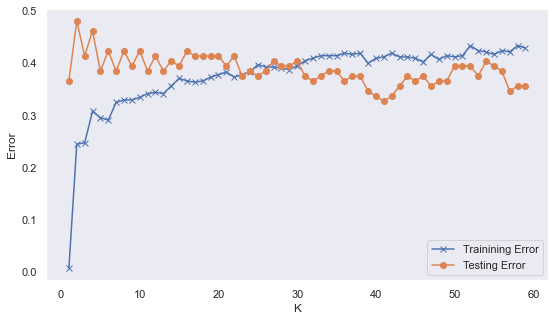

In [39]:
training_error = list()
testing_error = list()

for i in range(1, 60):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 60), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 60), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [40]:
# Creating and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 41) 
clf.fit(X_train, y_train)

# Using the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.6730769230769231


##### Remark
Since the least error occurs with 41 K-neighbours, it has been applied.

In [41]:
# Making prediction based on KNN
classes={0:'Safe',1:'Alert for fire'}
x =[[8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2]]
y_pred = clf.predict(x)
print(classes[y_predict[0]])

Safe


### Summary
* KNN classifier model helps to improve the prediction accuracy by 0.07%
    * The results indicate that there is a 67% chance to predict fires accurately
    * Since the testing accuracy is: 0.67
* Yet, the model is not a significant predictor.

##### Conclusion
The data length is not enough, and the correlations are not strong; Therefore, the accuracy is not high enough to predict whether there would be a fire in advance. If we could find more related features and data, then the model could be more accurate.